<a href="https://www.kaggle.com/code/mersaidylmaz/heart-failure-dataset-analysis-and-predict?scriptVersionId=147058798" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding: 35px;color:white;margin:10;font-size:240%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Veri Setini İnceleme </span></b> </div>
​

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,r2_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

### <b> <span style='color:#16C2D5'>|</span>  Verisetinin okunması</b> 

In [2]:
health = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df = health.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### <b> <span style='color:#16C2D5'>|</span> Eksik Gözlem  Analizi</b> 

In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### <b>IV <span style='color:#16C2D5'>|</span> Sayısal Değerlerin İncelenmesi</b> 

In [4]:
## Verisetinin sayısal değerlerin incelenmesi
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# <span style="color:#E888BB; font-size: 1%;">1 | Keşifçi Veri Analizi </span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'>1 | Keşifçi Veri Analizi </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Verisetinin Kalitesi</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Yinelenen Değerleri Tespit Etme </b> 

In [5]:
# Yinelenen değerler
duplicate_rows = df[df.duplicated()]
print("Yinelenen satır sayısı sayısı: ", duplicate_rows.shape)

Yinelenen satır sayısı sayısı:  (0, 13)


In [6]:
# Her Sütundaki benzersiz değerleri bulma
for column in df.columns:
    distinct_values = len(df[column].unique())
    print(f"{column}: {distinct_values} distinct values")

age: 47 distinct values
anaemia: 2 distinct values
creatinine_phosphokinase: 208 distinct values
diabetes: 2 distinct values
ejection_fraction: 17 distinct values
high_blood_pressure: 2 distinct values
platelets: 176 distinct values
serum_creatinine: 40 distinct values
serum_sodium: 27 distinct values
sex: 2 distinct values
smoking: 2 distinct values
time: 148 distinct values
DEATH_EVENT: 2 distinct values


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Çok Değişkenli Veri Analizi</span></b> </div>

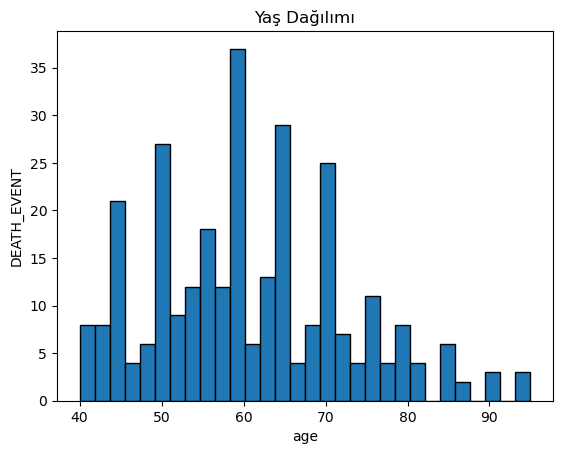

In [7]:
# Yaşın Histogram Grafiği
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Yaş Dağılımı')
plt.xlabel('age')
plt.ylabel('DEATH_EVENT')
plt.show()

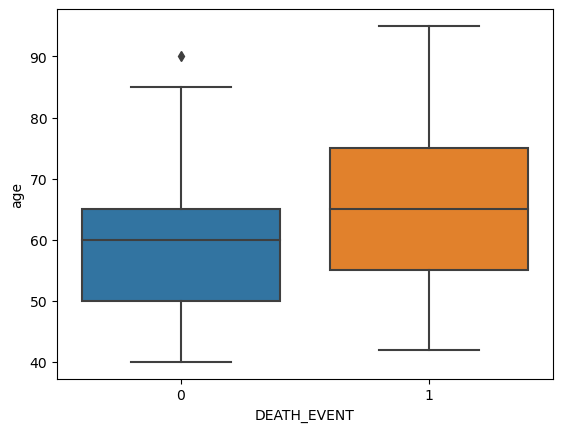

In [8]:
# Verinin Yaş değişkeni açısından incelenmesi
sns.boxplot(x = "DEATH_EVENT" , y = "age"  , data = df);

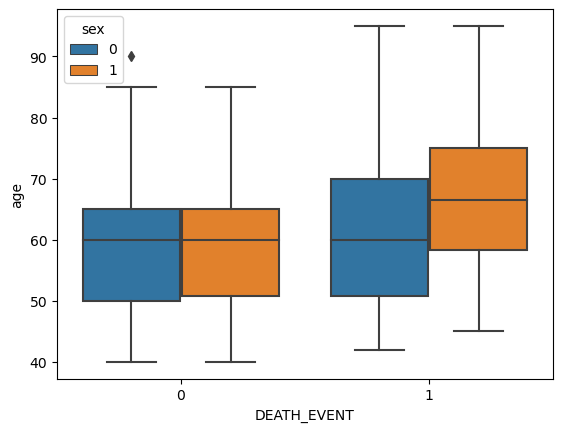

In [9]:
sns.boxplot(x = "DEATH_EVENT", y = "age", hue = "sex", data = df);

In [10]:
## Verinin cinsiyet ve ölüm sayısının ile gruplandırılıp yaş değerine göre ortalaması
pd.DataFrame(df.groupby(["sex","DEATH_EVENT"])["age"].mean())

age
sex DEATH_EVENT           
0   0            58.629113
    1            62.176471
1   0            58.833333
    1            66.881726

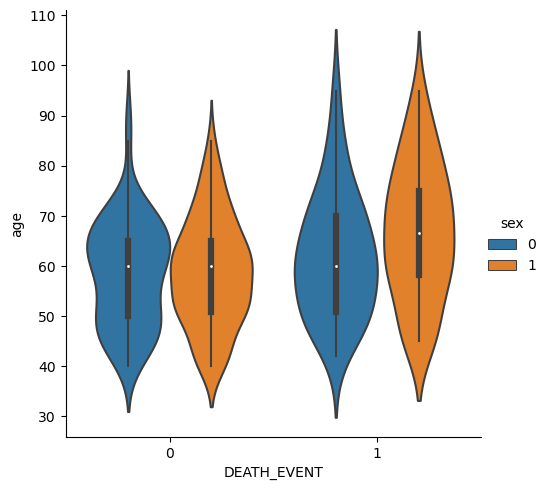

In [11]:
sns.catplot(x= "DEATH_EVENT", y = "age", hue = "sex" , kind = "violin", data = df);

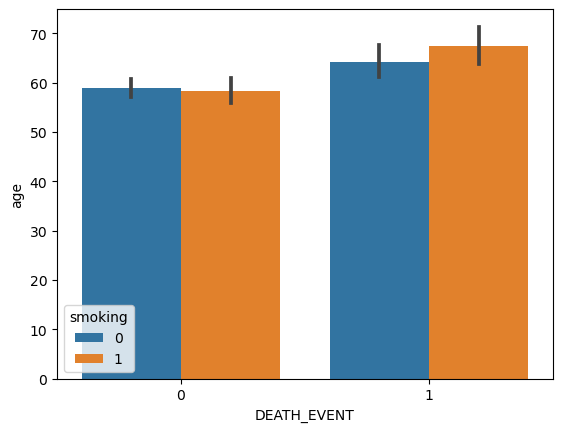

In [12]:
sns.barplot(x = "DEATH_EVENT", y = "age", hue = "smoking", data = df);

In [13]:
c0 = df[df.DEATH_EVENT==0]
c1 = df[df.DEATH_EVENT==1]
print(f'veri değeri 0: {len(c0)}\nveri değeri 1: {len(c1)}')

veri değeri 0: 203
veri değeri 1: 96


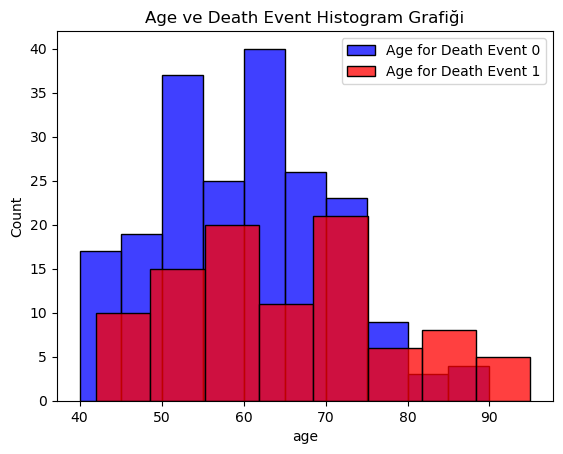

In [14]:
sns.histplot(c0.age,kde=False,color="blue", label="Age for Death Event 0")
sns.histplot(c1.age,kde=False,color = "red", label = "Age for Death Event 1")
plt.title("Age ve Death Event Histogram Grafiği")
plt.legend();

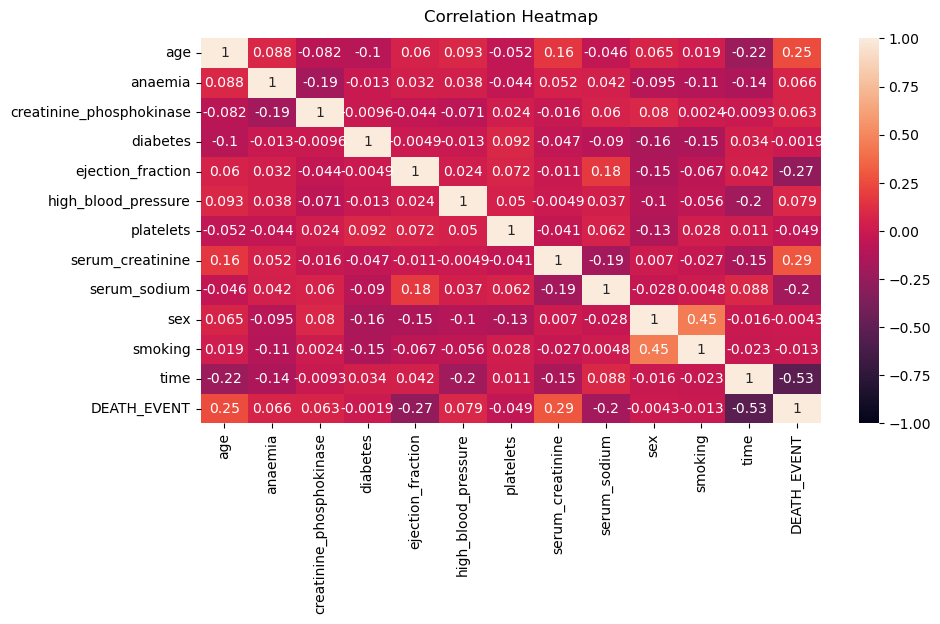

In [15]:
## Veriler arasında ki korelasyonun ısı haritası ile gösterimi 
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Makine Öğrenmesi Modeli Kurma

### Veriyi Test Ve Train Olarak Ayırma


In [16]:
X = df.drop("DEATH_EVENT" , axis= 1)
y = df["DEATH_EVENT"]

In [17]:
from sklearn.model_selection import train_test_split , GridSearchCV
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25 , random_state = 42)

In [18]:
print("X_train" , X_train.shape)
print("X_test" , X_test.shape)
print("y_train" , y_train.shape)
print("y_test" , y_test.shape)

X_train (224, 12)
X_test (75, 12)
y_train (224,)
y_test (75,)


In [19]:
##CART model ile tahmin işlemi
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier().fit(X_train , y_train)
y_pred_cart = cart_model.predict(X_test)
print("CART Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_cart))))

CART Accuracy:0.8326663997864531


In [20]:
##Random Forest Regresyon modeli tahmini yapmak için model import etme işlemi yapıyoruz
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42).fit(X_train , y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_rf))))

Random Forest Accuracy:0.8563488385776752


In [21]:
##Bagging Regressor ile tahmin işlemi
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(bootstrap_features = True).fit(X_train , y_train)
y_pred_bag = bag_model.predict(X_test)
print("Bagging Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_bag))))

Bagging Accuracy:0.8326663997864531


In [22]:
##GBM ile tahmin işlemi
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train , y_train)
y_pred_gbm = gbm_model.predict(X_test)
print("GBM Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_gbm))))

GBM Accuracy:0.8406346808612327


In [23]:
##Yapay Sinir ağı modeli ile tahmin işlemi
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier().fit(X_train , y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("MLPClassifier Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_mlp))))

MLPClassifier Accuracy:0.6429100507328637


In [24]:
## KNeighborsRegressor modeli ile tahmin işlemi
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train , y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNeighborsClassifier Accuracy:" + str(np.sqrt(accuracy_score(y_test , y_pred_knn))))

KNeighborsClassifier Accuracy:0.7393691004272944


In [25]:
## LGBM İle Model Kurma Ve Tahmin İşlemi
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier().fit(X_train , y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
print("LGBMClassifier Accuracy:" , np.sqrt(accuracy_score(y_test , y_pred_lgbm)))

LGBMClassifier Accuracy: 0.8563488385776752


In [26]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train , y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBClassifier Accuracy:" , np.sqrt(accuracy_score(y_test , y_pred_xgb)))

XGBClassifier Accuracy: 0.8406346808612327


In [27]:
model_names = ["XGBClassifier", "LGBMClassifier", "KNeighborsClassifier", "MLPClassifier", "GBM", "Bagging", "Random Forest", "CART"]
accuracies = [np.sqrt(accuracy_score(y_test , y_pred_xgb)), np.sqrt(accuracy_score(y_test , y_pred_lgbm)), 
              np.sqrt(accuracy_score(y_test , y_pred_knn)), np.sqrt(accuracy_score(y_test , y_pred_mlp)), 
              np.sqrt(accuracy_score(y_test , y_pred_gbm)), np.sqrt(accuracy_score(y_test , y_pred_bag)), 
              np.sqrt(accuracy_score(y_test , y_pred_rf)), np.sqrt(accuracy_score(y_test , y_pred_cart))]

df = pd.DataFrame({"Model": model_names, "Accuracy": accuracies})
print(df)

                  Model  Accuracy
0         XGBClassifier  0.840635
1        LGBMClassifier  0.856349
2  KNeighborsClassifier  0.739369
3         MLPClassifier  0.642910
4                   GBM  0.840635
5               Bagging  0.832666
6         Random Forest  0.856349
7                  CART  0.832666


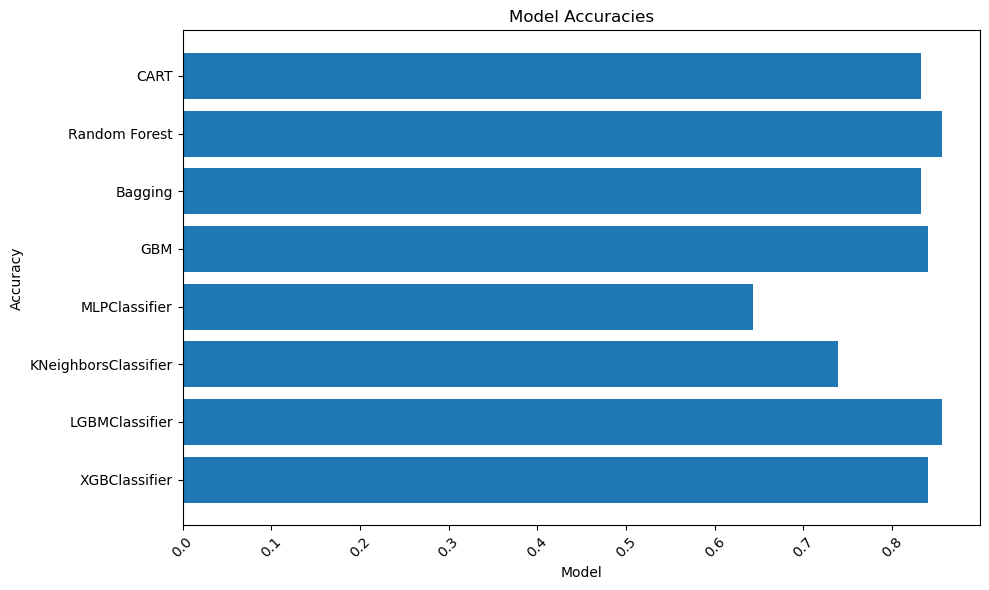

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(df["Model"], df["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sonuç

### Kurulan modeller ve test sonuçları ışığında en iyi doğruluk oranın veren modellerin LGBM ve Random Forest olduğu gözlenmiştir.